<a href="https://colab.research.google.com/github/edada2018/Big-Data-Analysis---Standard-CNN-and-Bagging-Learning-CNN/blob/main/Submitted_Deep_Learning_Final_EDada_StandardNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Elizabeth Dada - ELEG 6318 Deep Learning Project:
** Group Project Title: Covid-19 Recognition on Medical Images Via  
  Convolutional Neural Networks(CNN).

 **Task: Building Standard Neural Networks (SNN) for Group Project**

** Group Project Title: Covid-19 Recognition on Medical Images Via  
  Convolutional Neural Networks(CNN).



In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Change Directory
import os
os.chdir("/content/drive/MyDrive/DeepLearning_TeamProject")
!ls  # confirm that your .npy files are present

TeamProject.docx  x_test.npy  x_train.npy  y_test.npy  y_train.npy


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

# Load dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

# Split into train/validation
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Standard NN Model architecture
def build_model():
    model = Sequential([
        Flatten(input_shape=x_train.shape[1:]),
        Dense(256, activation='relu'),
        Dropout(0.6),
        Dense(128, activation='relu'),
        Dropout(0.6),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=RMSprop(learning_rate=0.00005),
        metrics=['accuracy']
    )

    model.summary()

    return model


In [ ]:
# Train  Standard NN Models
import time
# Measure training time
start_time = time.time()

# Model
model_full = build_model()
history_full = model_full.fit(
    x_train_new, y_train_new,
    epochs=30,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=0
)

end_time = time.time()
training_time = end_time - start_time
print(f"🕒 Total Training Time: {training_time:.2f} seconds")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    38,535,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,568,578 (147.13 MB)

 Trainable params: 38,568,578 (147.13 MB)

 Non-trainable params: 0 (0.00 B)

🕒 Total Training Time: 15.01 seconds


In [ ]:
# Final Step: Calculate Training & Testing Metrics
# Load testing data
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')


from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_model(model, x_train, y_train, x_test, y_test, label=""):

    # Training predictions
    train_pred = np.argmax(model.predict(x_train), axis=1)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(
        y_train, train_pred, average='weighted')

    # Testing predictions
    test_pred = np.argmax(model.predict(x_test), axis=1)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
        y_test, test_pred, average='weighted')

    # Output
    print(f"\n📊 Results for {label}")
    print(f"Training  - Acc: {train_accuracy:.4f}, Prec: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
    print(f"Testing   - Acc: {test_accuracy:.4f}, Prec: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

# Evaluate models
evaluate_model(model_full, x_train_new, y_train_new, x_test, y_test, label="Standard NN (Full Training)")


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

📊 Results for Standard NN (Full Training)
Training  - Acc: 0.8333, Prec: 0.6944, Recall: 0.8333, F1: 0.7576
Testing   - Acc: 0.8400, Prec: 0.7056, Recall: 0.8400, F1: 0.7670


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


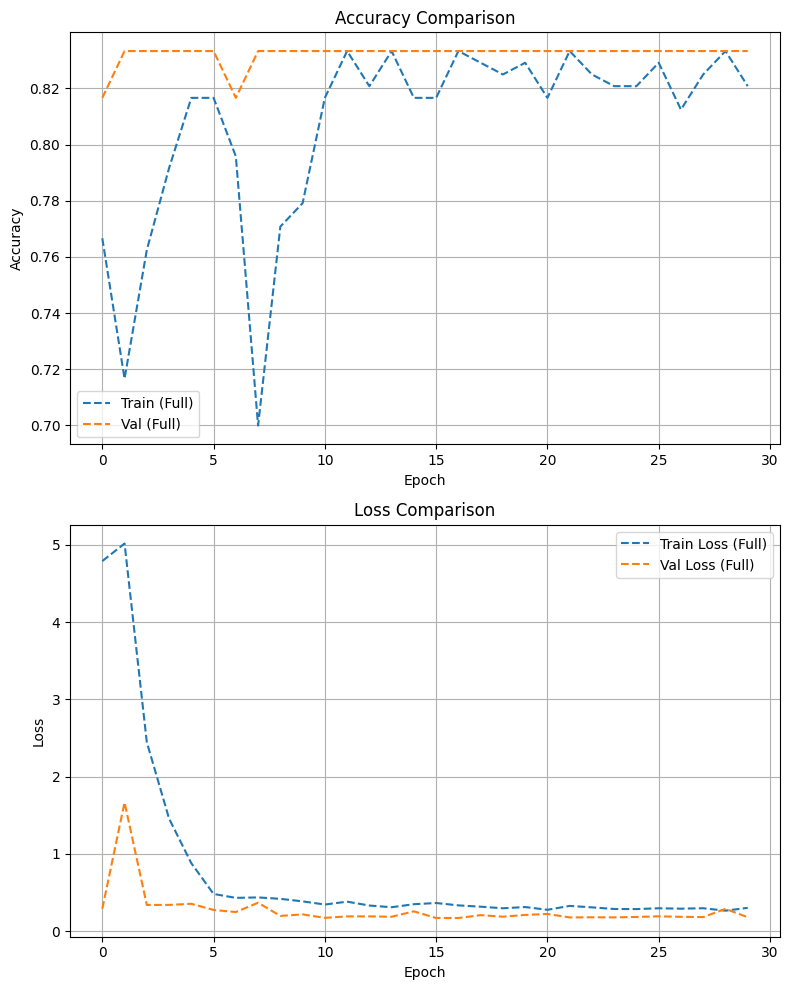

In [ ]:
# Plot Accuracy and Loss vertically
plt.figure(figsize=(8, 10))  # Taller height for stacked layout

# Accuracy Plot (Top)
plt.subplot(2, 1, 1)
plt.plot(history_full.history['accuracy'], '--', label='Train (Full)')
plt.plot(history_full.history['val_accuracy'], '--', label='Val (Full)')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot (Bottom)
plt.subplot(2, 1, 2)
plt.plot(history_full.history['loss'], '--', label='Train Loss (Full)')
plt.plot(history_full.history['val_loss'], '--', label='Val Loss (Full)')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
